In [6]:
import numpy as np

import paths

from ged.GED import ged
from utils.graphfiles import loadDataset
from ged.costfunctions import RiesenCostFunction, BasicCostFunction
from ged.bipartiteGED import computeBipartiteCostMatrix, getOptimalMapping

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


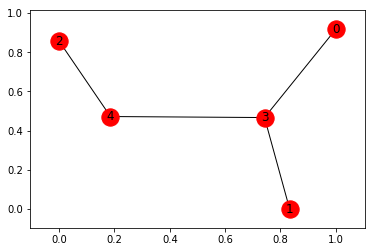

[0, 1, 4]


In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot  as plt

# We load a ds dataset
dataset, y = loadDataset("/home/bgauzere/work/Datasets/Acyclic/dataset_bps.ds")

In [3]:
#Compute graph edit distances

from tqdm import tqdm
from c_ext.lsape_binders import  lsap_solverHG
import time

cf = BasicCostFunction(3,1,3,1)
N=len(dataset)

methods=['Riesen + LSAP', 'Neigh + LSAP', 'Riesen + LSAPE', 'Neigh + LSAPE']
ged_distances = [ np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N)), np.zeros((N,N))]

times = list()
start = time.clock()
for i in tqdm(range(0,N)):
    for j in range(0,N):
        ged_distances[0][i,j] = ged(dataset[i],dataset[j],cf=cf, method='Riesen')[0]
times.append(time.clock() - start)


start = time.clock()
for i in tqdm(range(0,N)):
    for j in range(0,N):
        ged_distances[1][i,j] = ged(dataset[i],dataset[j],cf=cf, method='Neighboorhood')[0]

times.append(time.clock() - start)

start = time.clock()
for i in tqdm(range(0,N)):
    for j in range(0,N):
        ged_distances[2][i,j] = ged(dataset[i],dataset[j],cf=cf, method='Riesen',solver=lsap_solverHG)[0]
times.append(time.clock() - start)

start = time.clock()
for i in tqdm(range(0,N)):
    for j in range(0,N):
        ged_distances[3][i,j] = ged(dataset[i],dataset[j],cf=cf, method='Neighboorhood',solver=lsap_solverHG)[0]
times.append(time.clock() - start)

100%|██████████| 183/183 [03:48<00:00,  1.25s/it]


In [5]:
print(" method \t mean \t mean \t time")
data = list()

for i in range(0,len(ged_distances)):
    ged_ = np.minimum(ged_distances[i],ged_distances[i].transpose())
    print(" {} \t  {} \t {} \t {} ".format(methods[i], np.mean(ged_distances[i]),np.mean(ged_), times[i])


 method 	 mean 	 mean 	 dev 	 time
 Riesen + LSAP 	  0.0 	 0.0 	 -0.994535519125683 	 -14.283137746722804
 Neigh + LSAP 	  0.0 	 0.0 	 -0.994535519125683 	 -14.283137746722804
 Riesen + LSAPE 	  19.770670966586042 	 19.122338678372003 	 0.4757055896177035 	 4.839200931649199
 Neigh + LSAPE 	  0.0 	 0.0 	 -0.994535519125683 	 -14.283137746722804
